### Model Training EDA in Jupyter notebook

##### 1.1 importing data and requirements 

##### pandas, Matplotlib, numpy, seaborn, warning module, sklearn

In [1]:
# basic imports 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
# modelling iports
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer


#### importing data

In [2]:
data_frame = pd.read_csv("/Users/dhiremath/02 pesonal/Personal docs/ML_project_youtube_Krish_naik/notebook/data/stud.csv")
data_frame.head(5 )

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


#### preparing X and Y variables 

In [3]:
X = data_frame.drop(columns =["math_score"], axis=1)
X.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,74
1,female,group C,some college,standard,completed,90,88
2,female,group B,master's degree,standard,none,95,93
3,male,group A,associate's degree,free/reduced,none,57,44
4,male,group C,some college,standard,none,78,75


In [4]:
Y = data_frame["math_score"]
Y.head()

0    72
1    69
2    90
3    47
4    76
Name: math_score, dtype: int64

In [5]:
print("different categories in non numerical colums" , end= ":")

print("gender: ", end ="")
print(data_frame['gender'].unique())
print("race_ethnicity: ", end ="")
print(data_frame['race_ethnicity'].unique())
print("parental_level_of_education: ", end ="")
print(data_frame['parental_level_of_education'].unique())
print("lunch: ", end ="")
print(data_frame['lunch'].unique())
print("test_preparation_course: ", end ="")
print(data_frame['test_preparation_course'].unique())





different categories in non numerical colums:gender: ['female' 'male']
race_ethnicity: ['group B' 'group C' 'group A' 'group D' 'group E']
parental_level_of_education: ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
lunch: ['standard' 'free/reduced']
test_preparation_course: ['none' 'completed']


In [6]:
# preparing the data into categorical and numerical data for  one hot coding and standardizaion

num_features = X.select_dtypes(exclude ='object').columns

cat_features = X.select_dtypes(include=["object"]).columns
# num_features
# cat_features

In [7]:
num_transformer = StandardScaler()
cat_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    [
        ("numerical columns transformation", num_transformer, num_features),
        ("categorical columns transform", cat_transformer, cat_features)
    ]
)
preprocessor

ColumnTransformer(transformers=[('numerical columns transformation',
                                 StandardScaler(),
                                 Index(['reading_score', 'writing_score'], dtype='object')),
                                ('categorical columns transform',
                                 OneHotEncoder(),
                                 Index(['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch',
       'test_preparation_course'],
      dtype='object'))])

In [8]:
X = preprocessor.fit_transform(X)
X.shape

/Users/dhiremath/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/dhiremath/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/dhiremath/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/dhiremath/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Ch

(1000, 19)

In [9]:
# splittign the data for test and train

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size= .2, random_state= 42) 
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((800, 19), (200, 19), (800,), (200,))

#### creating evaluation function to run after model training

In [10]:
def model_evaliation(true, predicted):
    mae=   mean_absolute_error(true, predicted)
    #mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_squared = r2_score(true, predicted)

    return mae,rmse,r2_squared


##### Setting up the models list 

In [11]:
# list of models to apply in loop and compare its perfoormance

models = {
    "Linear Regression": LinearRegression(),
    "lasso": Lasso(),
    "ridge": Ridge(),
    "decision Tree": DecisionTreeRegressor(),
    "Randon Forest": RandomForestRegressor(),
    "K-Neighbors regression": KNeighborsRegressor(),
    "Support vector machine" : SVR(),
    "ADA Boost": AdaBoostRegressor(),
    "XG boost Regression": XGBRegressor(),
    "cat Boost Regression": CatBoostRegressor()
}

# to collect the models and the resulting scores
models_list =[]
mae_results_list =[]
r2_squared_results_list= []
rmse_result_list =[]

# applying the models in loop

for i in range(len(list(models))):
    model = list (models.values())[i]
    model.fit(X_train, Y_train) # trainign the model

    # predicting the output
    Y_train_predict = model.predict(X_train) 
    Y_test_predict = model.predict(X_test) 

    #evaluate model performance
    mae_train,rmse_train,r2_squared_train = model_evaliation(Y_train,Y_train_predict)
    mae,rmse,r2_squared = model_evaliation(Y_test,Y_test_predict)

    model_name = list(models.keys())[i]
    models_list.append(model_name)
    r2_squared_results_list.append(r2_squared)
    rmse_result_list.append(rmse)
    mae_results_list.append(mae)

    print("performance indicators for model:{0} for training set are: mae = {1}, rmse = {2}, r2_squared = {3}".format(model_name,mae_train, rmse_train,r2_squared_train))
    print("performance indicators for model:{0} for test set are: mae = {1}, rmse = {2}, r2_squared = {3}".format(model_name,mae, rmse,r2_squared))

performance indicators for model:Linear Regression for training set are: mae = 4.266711846071956, rmse = 5.323050852720514, r2_squared = 0.8743172040139593
performance indicators for model:Linear Regression for test set are: mae = 4.21476314247485, rmse = 5.393993869732841, r2_squared = 0.8804332983749565
performance indicators for model:lasso for training set are: mae = 5.206296077972952, rmse = 6.593807540619166, r2_squared = 0.8071466723085148
performance indicators for model:lasso for test set are: mae = 5.157879138921816, rmse = 6.519688056285626, r2_squared = 0.825320079562973
performance indicators for model:ridge for training set are: mae = 4.26498782372598, rmse = 5.323324922741654, r2_squared = 0.8743042615212909
performance indicators for model:ridge for test set are: mae = 4.211100688014258, rmse = 5.390387016935635, r2_squared = 0.880593148502874
performance indicators for model:decision Tree for training set are: mae = 0.01875, rmse = 0.2795084971874737, r2_squared = 0.99

/Users/dhiremath/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/dhiremath/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/dhiremath/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/dhiremath/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.


performance indicators for model:Randon Forest for training set are: mae = 1.849475, rmse = 2.345068350327626, r2_squared = 0.9756069776301125
performance indicators for model:Randon Forest for test set are: mae = 4.714858333333333, rmse = 6.05901797197551, r2_squared = 0.8491331463315193
performance indicators for model:K-Neighbors regression for training set are: mae = 4.51675, rmse = 5.712753276660913, r2_squared = 0.8552410116072555
performance indicators for model:K-Neighbors regression for test set are: mae = 5.619, rmse = 7.253757646902741, r2_squared = 0.7837702557426202
performance indicators for model:Support vector machine for training set are: mae = 4.869189452384868, rmse = 6.57700724251018, r2_squared = 0.8081281585902299
performance indicators for model:Support vector machine for test set are: mae = 5.401539244496997, rmse = 8.126623218622633, r2_squared = 0.7286001513223705


/Users/dhiremath/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/dhiremath/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/dhiremath/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/dhiremath/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.


performance indicators for model:ADA Boost for training set are: mae = 4.746289799648981, rmse = 5.830379337968133, r2_squared = 0.8492184417881263
performance indicators for model:ADA Boost for test set are: mae = 4.774721614834082, rmse = 6.123707172486807, r2_squared = 0.8458944846585399
performance indicators for model:XG boost Regression for training set are: mae = 0.6147581052780151, rmse = 0.9087352405171366, r2_squared = 0.996337063889075
performance indicators for model:XG boost Regression for test set are: mae = 5.070335817337036, rmse = 6.621583071401701, r2_squared = 0.8198173310440375
Learning rate set to 0.039525
0:	learn: 14.5987177	total: 51.3ms	remaining: 51.3s
1:	learn: 14.2251886	total: 51.7ms	remaining: 25.8s
2:	learn: 13.8866124	total: 52.1ms	remaining: 17.3s
3:	learn: 13.5235688	total: 52.6ms	remaining: 13.1s
4:	learn: 13.1887021	total: 53ms	remaining: 10.5s
5:	learn: 12.9124226	total: 53.4ms	remaining: 8.84s
6:	learn: 12.6000335	total: 53.8ms	remaining: 7.64s
7:	

/Users/dhiremath/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/dhiremath/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/dhiremath/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/dhiremath/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.


In [12]:
# reading the resutls in to a data frame 
pd.DataFrame(list(zip(models_list,mae_results_list, rmse_result_list,r2_squared_results_list)), columns=["model_name","mae","rmse","r2_squared"]).sort_values(by='r2_squared', ascending=False)



,model_name,mae,rmse,r2_squared
2,ridge,4.211101,5.390387,0.880593
0,Linear Regression,4.214763,5.393994,0.880433
9,cat Boost Regression,4.612532,6.008632,0.851632
4,Randon Forest,4.714858,6.059018,0.849133
7,ADA Boost,4.774722,6.123707,0.845894
1,lasso,5.157879,6.519688,0.825320
8,XG boost Regression,5.070336,6.621583,0.819817
5,K-Neighbors regression,5.619000,7.253758,0.783770
3,decision Tree,6.320000,7.973707,0.738718
6,Support vector machine,5.401539,8.126623,0.728600


#### Linear regression tinkering

In [13]:
linear_model = LinearRegression(fit_intercept= True)
linear_model= linear_model.fit(X_train, Y_train)
y_linear_predict = linear_model.predict(X_test)
r2_score_value = r2_score(y_linear_predict, Y_test)*100
print("linear r2_score value is %.2f" %r2_score_value)

linear r2_score value is 86.70


/Users/dhiremath/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/dhiremath/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/dhiremath/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/dhiremath/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.


##### plotting the resutls for better visualization

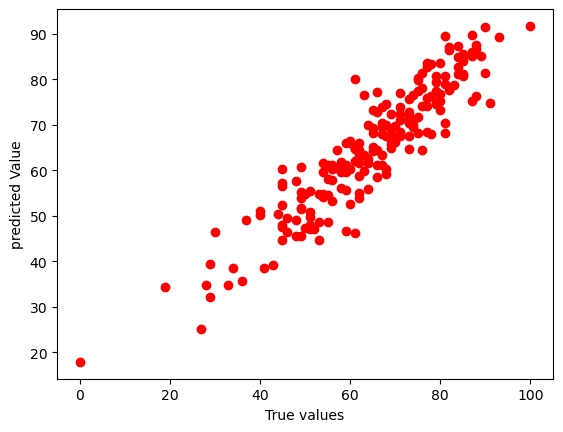

In [14]:
plt.scatter(Y_test, Y_test_predict, c='red')
plt.xlabel("True values")
plt.ylabel("predicted Value")
plt.show()

<Axes: xlabel='math_score'>

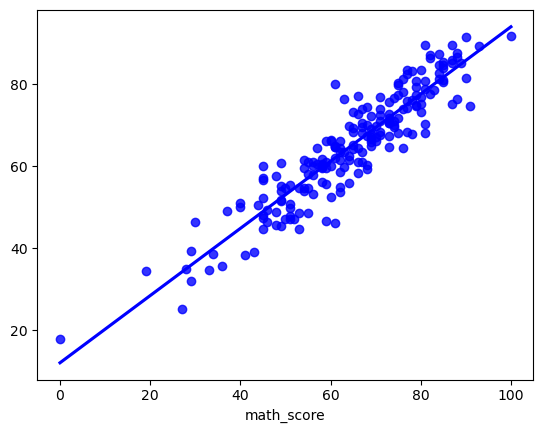

In [15]:
sns.regplot(x=Y_test, y=Y_test_predict, ci=None, color= 'blue')

In [16]:
Predicted_data = pd.DataFrame({"actual Value":Y_test, "Predicted Value": Y_test_predict, "difference": Y_test-Y_test_predict})
Predicted_data

,actual Value,Predicted Value,difference
521,91,74.709499,16.290501
737,53,54.706876,-1.706876
740,80,76.842097,3.157903
660,74,76.580288,-2.580288
411,84,87.297491,-3.297491
...,...,...,...
408,52,47.095579,4.904421
332,62,58.745708,3.254292
208,74,69.989700,4.010300
613,65,68.313052,-3.313052
